In [38]:
import csv
import os
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np

In [39]:
options_dir = '../data/options_data'
for ticker in os.listdir(options_dir):
    ticker_dir = options_dir + '/' + ticker
    call_files = []
    put_files = []
    for file in os.listdir(ticker_dir):
        file_heruistics = file.split('_')
        strike = file_heruistics[2].split('-', 1)
        expiry_date = datetime.strptime(file_heruistics[1], '%Y%m%d').date()

        if 'c' in strike[0].replace('.csv', ''):
            call_files.append((file, expiry_date))
        if 'p' in strike[0].replace('.csv', ''):
            put_files.append((file, expiry_date))

    call_files.sort(key=lambda contract: contract[1])
    put_files.sort(key=lambda contract: contract[1])

    #implement synthetic long strategy
    balance = 100000
    
    callContracts = 0
    putContracts = 0
    csv_data = []
    c_csv_data = []
    p_csv_data = []
    smaller = call_files
    
    if(len(call_files) > len(put_files)):
        smaller = put_files
    print('CALL FILES: '+str(len(call_files)) +' PUT FILES: '+ str(len(put_files)))
    for x in range(len(smaller)):

        cfile, c_expiry_date = call_files[x]
        pfile, p_expiry_date = put_files[x]

        with open(os.path.join(ticker_dir, cfile), 'r') as f:
            #CALL LOGIC: BUY AT BEGINNING OF EACH MONTH
            strike_csv = csv.reader(f)
            row = list(strike_csv)

            for index, line in reversed(list(enumerate(row[0:len(row)-1]))):
                date = datetime.strptime(line[0], '%m/%d/%Y').date()
                if date.month == c_expiry_date.month:
                    c_start_open = float(row[index][1])
                    c_strike_price = float(row[index][16])
                    c_start_price = float(row[index][15])
                    c_end_price = float(row[1][15])
                    break

            # buy call contracts + subtract balance
            
            callContracts = math.floor((balance*.75)/(c_start_open * 100))
            balance -= (c_start_open * 100) * callContracts
            
        with open(os.path.join(ticker_dir, pfile), 'r') as f:
            #PUT LOGIC: SELL AT BEGINNING OF EACH MONTH
            strike_csv = csv.reader(f)
            row = list(strike_csv)

            for index, line in reversed(list(enumerate(row[0:len(row)-1]))):
                date = datetime.strptime(line[0], '%m/%d/%Y').date()
                if date.month == p_expiry_date.month:
                    p_start_open = float(row[index][1])
                    p_strike_price = float(row[index][16])
                    p_start_price = float(row[index][15])
                    p_end_price = float(row[1][15])
                    break

            # sell put contracts + add balance
            
            putContracts = math.floor((math.fabs(balance)*.75)/(p_start_open * 100))
            balance += (p_start_open * 100) * putContracts

        
        # compare end asset price to strike price
        if c_end_price >= c_strike_price:
            #Call expires in the money we gain difference between strike and actual price times contracts times 100
            stockSale = (callContracts * 100) * (c_end_price - c_strike_price)
            balance += stockSale
            profits = stockSale
            
        else:
            #Put expires in the money we lose difference between strike and actual price times contracts times 100
            #If put expires ITM we must buy back 100 shares times contracts
            stockPurchase = (putContracts * 100) * (p_strike_price - p_end_price)
            balance -= stockPurchase
            profits = stockPurchase * -1
            
            
        total_balance = balance

        # obtain 'results'
        net_percentage = ((total_balance - 100000) / 100000) * 100
        net_return = total_balance - 100000

        
        csv_data.append([p_expiry_date, date, p_strike_price, p_start_price, p_end_price, c_start_open, putContracts, profits,total_balance, net_percentage, net_return])

    with open('../data/outputs/synthetic_long/' + ticker + '.csv', 'w', newline="") as f:
        writer = csv.writer(f)

        header = ['Expiration Date', 'Date Position Opened', 'Strike Price', 'Starting asset price', 'Ending Asset Price', 'Price Per Contract', 'Contracts', 'Contract Profit/Loss', 'Monthly Ending Balance', 'Percent Change', 'Profit Amount']
        writer.writerow(header)

        for row in csv_data:
            writer.writerow(row)

CALL FILES: 24 PUT FILES: 24
CALL FILES: 24 PUT FILES: 24
CALL FILES: 24 PUT FILES: 24
CALL FILES: 24 PUT FILES: 24


AMD.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [318946.0, 1276521.0, 397066.0, 97338.0, 65518.0, 132952.0, 159267.0, 26705.0, 206846.0, 347226.0, -15134.0, -4127.0, -9957.0, -3101.0, -421.0, -61.0, 364.0, 364.0, 614.0, 1071.0, 1750.0, 2468.0, 941.0, 2359.0]
y2-axis vals: [249810.88, 199389.0, 222141.4, 208961.3, 173290.66, 132993.89, 137474.54, 128396.86, 145883.04, 149170.79, 166831.54, 169595.58, 119057.32, 138551.06, 164242.07, 125283.68, 53069.54, 56531.86, 52429.44, 32324.7, 32324.7, 36747.16, 33430.32, 13907.48]


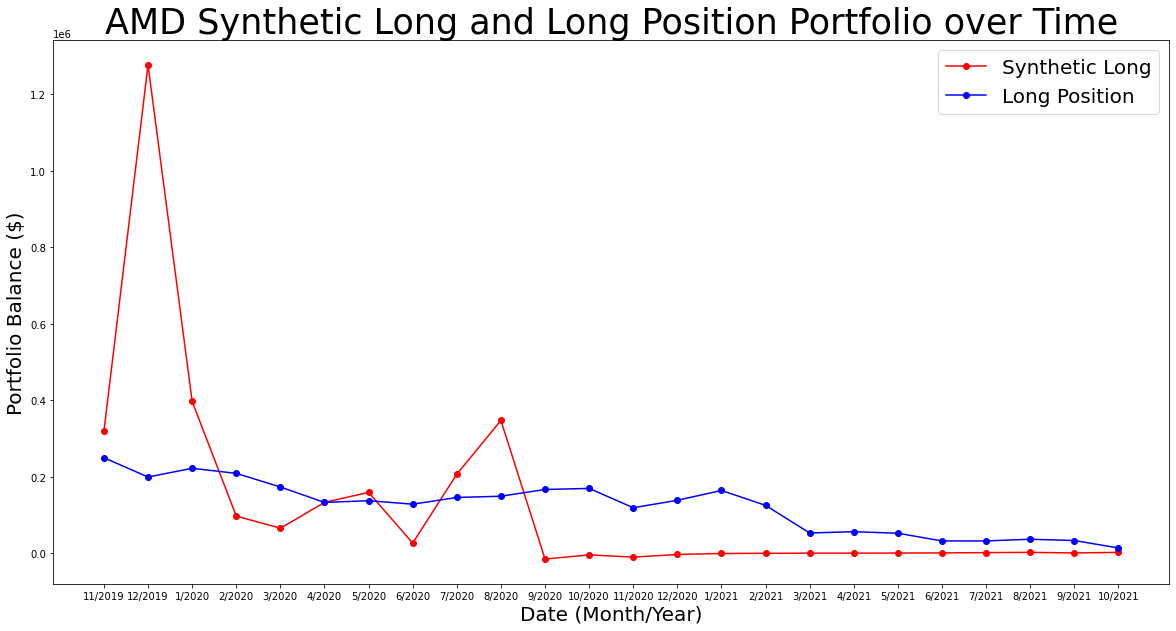

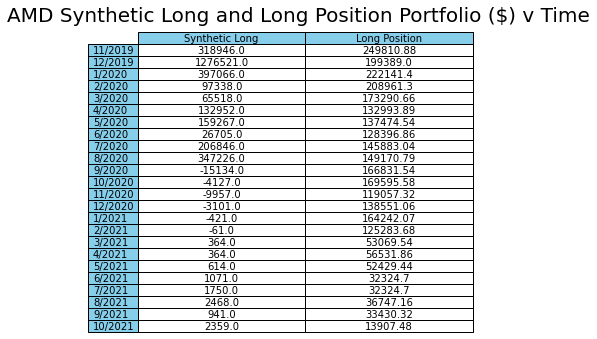

F.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [40979.0, 84981.0, 64763.0, -10163.0, -15334.0, -5081.0, -651.0, -915.0, -932.0, -420.0, -604.0, -1682.0, -2957.0, -311.0, -1363.0, -1528.0, -2356.0, -868.0, -3000.0, -498.0, -201.0, -48.0, -81.0, -307.0]
y2-axis vals: [97685.19, 63888.89, 50810.19, 61458.33, 71990.74, 68171.3, 33564.81, 41782.41, 35416.67, 21875.0, 1736.11, 5092.59, -10532.41, -22916.67, -21064.81, -23495.37, -29629.63, -33912.04, -41087.96, -44097.22, -19444.44, 2083.33, 7638.89, 4861.11]


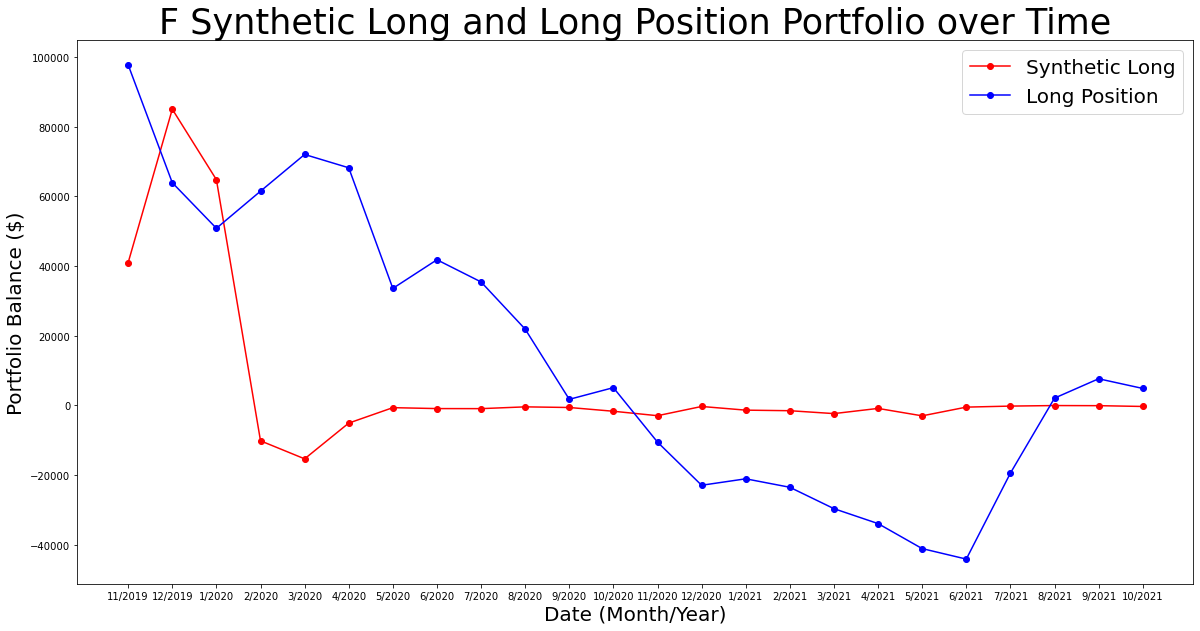

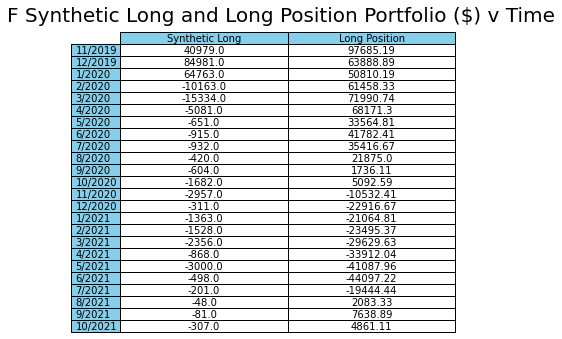

GM.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [39626.0, 87326.0, 11903.0, 14463.0, -17321.0, -26021.0, -11513.0, -4708.0, -423.0, -1431.0, -2121.0, -5445.0, -18193.0, -8931.0, -19895.0, -4275.0, -12956.0, -4806.0, -772.0, -72.0, 40.0, 40.0, 40.0, 40.0]
y2-axis vals: [46277.88, 41655.47, 31711.91, 52754.64, 59016.39, 59392.64, 53775.87, 54420.85, 37946.79, 36199.95, 11905.4, 17817.79, -7202.36, -20478.37, -20370.87, -33109.38, -32007.52, -30448.8, -40096.75, -44154.8, -18032.79, -10266.06, -1639.34, -3251.81]


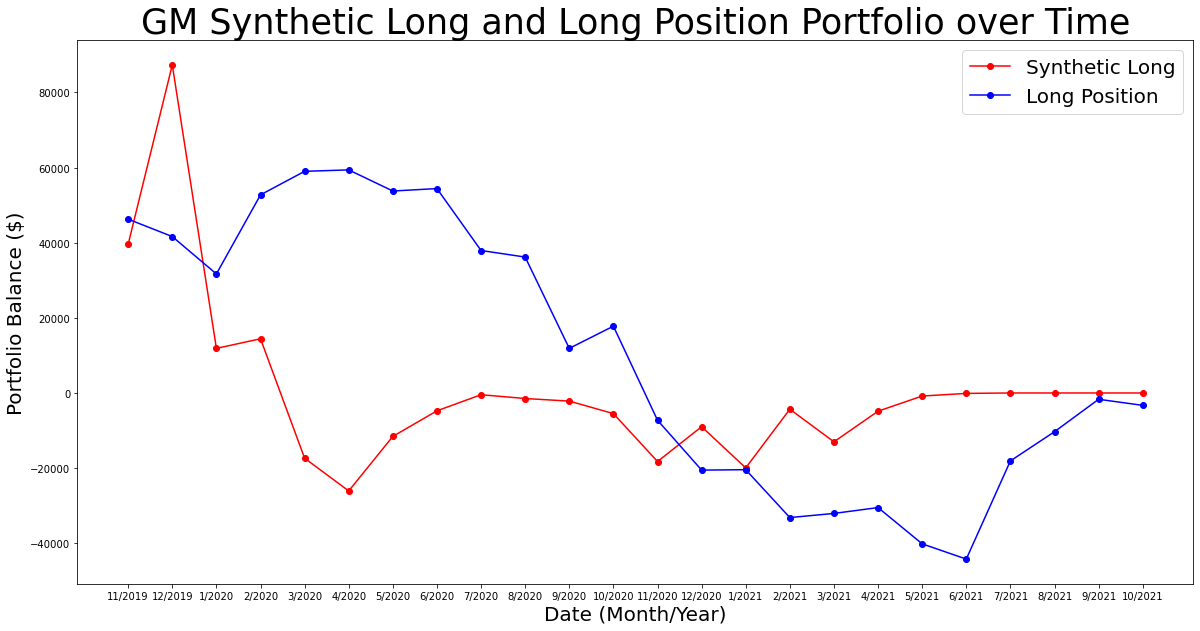

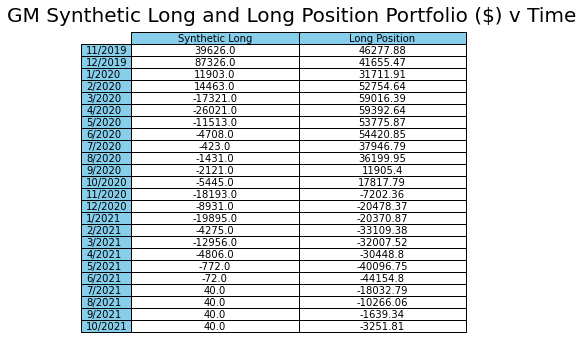

MSFT.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [214366.0, 488151.0, 1064255.0, 92945.0, 10145.0, 27062.0, 39192.0, 100954.0, 85734.0, 237888.0, 17265.0, 4230.0, 6177.0, 9147.0, 21129.0, 5680.0, 4125.0, 7381.0, 3695.0, 8919.0, 19294.0, 51282.0, 20712.0, 134205.0]
y2-axis vals: [129876.61, 95424.93, 109261.06, 97497.57, 87785.94, 73076.39, 74809.37, 63434.08, 61084.15, 60793.01, 54179.95, 48391.79, 40350.76, 45799.25, 56335.78, 42111.47, 41071.68, 27027.59, 24227.09, 9323.44, 12304.17, 18002.22, 9316.51, 4935.53]


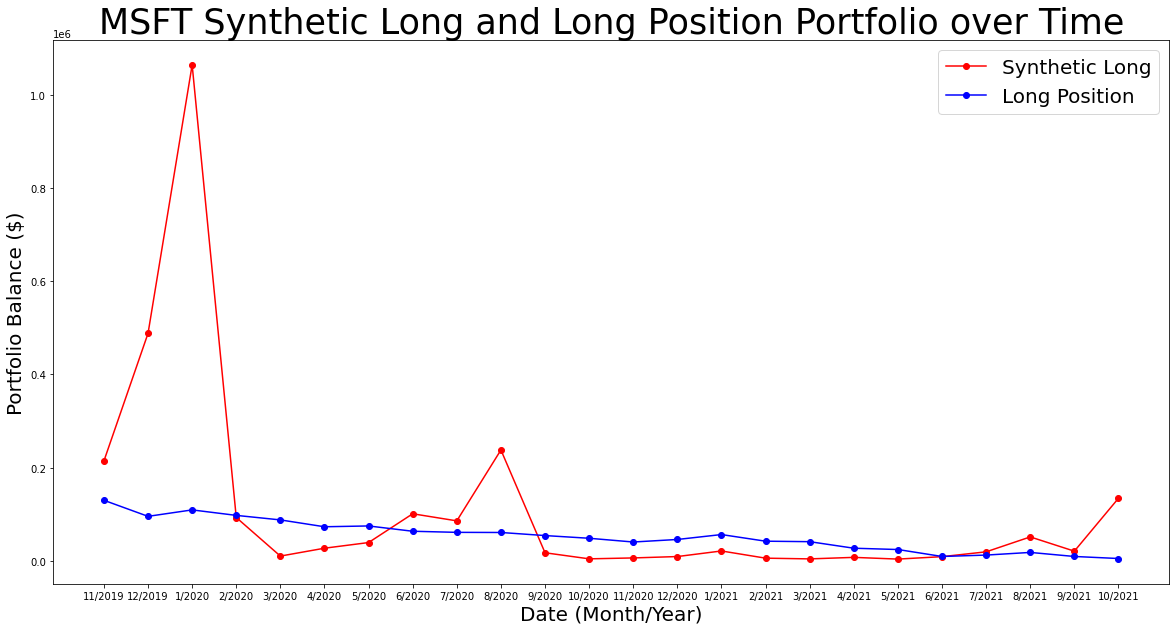

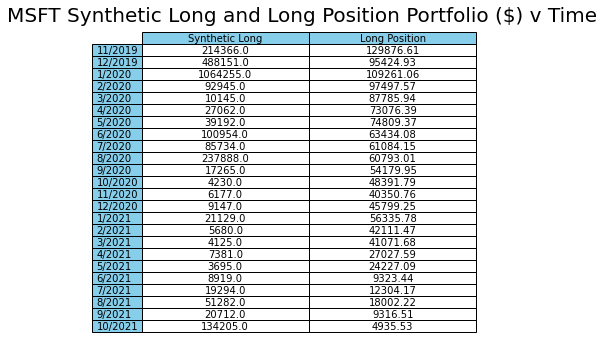

In [40]:
# graph results using matlab pyplot

outputs = '../data/outputs/synthetic_long/'
historical_outputs = '../data/outputs/historical_returns/'
files = [f for f in os.listdir(outputs) if os.path.isfile(os.path.join(outputs, f))]

for file in files:
    with open(os.path.join(outputs, file), 'r') as f:
        output_csv = csv.reader(f)
        rows = list(output_csv)
        
        profits = []
        monthly_balance = []
        months = []
        long_monthly_bal = []

        for line in rows[1:]:
            profits.append(round(float(line[10]), 2))
            monthly_balance.append(round(float(line[8]),2))
            date = datetime.strptime(line[0], "%Y-%m-%d").date()
            months.append(str(date.month) + '/' + str(date.year))

    with open(os.path.join(historical_outputs, file), 'r') as f:
        output_csv = csv.reader(f)
        rows = list(output_csv)
        for line in rows[1:]:
            long_monthly_bal.append(float(line[5]))
    long_monthly_bal.reverse()
    
    
    print(file)
    print("data points: " + str(len(monthly_balance)))
    print('x-axis values: ' + str(months))
    print('y-axis values: ' + str(monthly_balance))
    print('y2-axis vals: ' + str(long_monthly_bal))
    
    x1 = months
    y1 = monthly_balance
    y2 = long_monthly_bal
    

    plt.figure(figsize=(20,10))
    plt.rcParams['font.size'] = '10'
    plt.plot(x1, y1, color='red', marker='o', label="Synthetic Long")
    plt.plot(x1, y2, color='blue', marker='o', label='Long Position')
    plt.xlabel("Date (Month/Year)", fontsize=20)
    plt.ylabel("Portfolio Balance ($)", fontsize=20)
    
    plt.title(file.replace('.csv', '') + ' Synthetic Long and Long Position Portfolio over Time', fontsize=35)
    plt.legend(fontsize=20)

    plt.savefig('../data/outputs/synthetic_long/graphs/' + file.replace('.csv', '') + '_balance_v_time.jpg')
    plt.show()

    columns = ('Synthetic Long', 'Long Position')
    rows = ['%s' % x for x in months]
    nparr1 = np.array(monthly_balance)
    nparr2 = np.array(long_monthly_bal)

    np2d = np.vstack((nparr1, nparr2)).T
    
    fig, ax = plt.subplots() 
    ax.set_axis_off() 
    table = ax.table( 
        cellText = np2d,  
        rowLabels = rows,  
        colLabels = columns, 
        rowColours =["skyblue"] * 24,  
        colColours =["skyblue"] * 24, 
        cellLoc ='center',  
        loc ='upper left')         
    
    ax.set_title(file.replace('.csv', '') + ' Synthetic Long and Long Position Portfolio ($) v Time',
                fontsize=20)

    plt.savefig('../data/outputs/synthetic_long/graphs/' + file.replace('.csv', '') + '_data_table.jpg',
                bbox_inches='tight', dpi=150)
    plt.show()
        
